In [926]:
import warnings
warnings.filterwarnings('ignore')

In [927]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split,cross_val_score,StratifiedKFold,GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc, precision_score, recall_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt

# Попробуем решить ML часть задачи разработки anti-fraud системы

In [928]:
GeneralDataFrame = pd.read_csv('./creditcard.csv') #kaggle credit cards
GeneralDataFrame.shape

(284807, 31)

In [929]:
GeneralDataFrame.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [930]:
GeneralDataFrame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


В нашем распоряжении есть набор данных, в котором около 300к записей транзакций по банковским картам. Судя по тому, что мы видим первым взглядом, можно говорить о том что наши данные уже стандартизированы, все поля кроме Amount. Имеем 2 метки классов 0 - NotFraud, 1 - Fraud, целевой класс, который будем пытаться предсказывать - Fraud.
Заметим еще то, что данные у нас анонимные, это связано со спецификой решаемой задачи, финансовые данные как и медицинские должны быть защещены путем анонимизации, если вы конечно не чей-то личный врач или банкир.

Как говорилось ранее в лекции, особенность задачи anti-fraud заключается в том, что скорее всего мы будем работать с несбалансированными по классам выборками. Чаще всего хороших транзакций гораздо больше чем мошеннических, потому что каждый участник процесса формирования и обработки транзакций на своей стороне пытается снизить количество фродовых транзакций, да и в принципе мошенников меньше чем нормальных людей, поэтому работаем с тем что есть.

Посмотрим, можем нам повезло и у нас классы сбалансированы:

In [931]:
Names = {0:'Not_Fraud',1:'Fraud'}
print(GeneralDataFrame.Class.value_counts().rename(index = Names))

Not_Fraud    284315
Fraud           492
Name: Class, dtype: int64


Увы, конечно же они не будут сбалансированы, ничего удивительного, причем в нашем случае расхождение в количестве ппримеров каждого класса очень сильное, в несколько порядков.

Разделим наш набор данных на предикторы и целевую перменную, которую будем пытаться предсказывать. Избавимся от столбца Time, в данном случае мы не пытаемся решить задачу прогнозирования временных рядов, поэтому информации для нас в этой переменной не так уж и много.

In [932]:
FeatureNames = GeneralDataFrame.iloc[:,1:30].columns
Target = GeneralDataFrame.iloc[:1,30:].columns
print(FeatureNames)
print(Target)

DataFeatures = GeneralDataFrame[FeatureNames]
DataTarget = GeneralDataFrame[Target]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


Мы изначально заметили дисбаланс классов, уже сходу понимаем что строить классификатор на таких данных это не очень хорошая идея, потому что мы скорее всего получим ситуацию переобучения модели под конкретный класс (под тот класс примеров которого больше). Но все же чисто в исследовательских целях обучим какой-нибудь простой алгоритм типа логистической регрессии, просто для понимания того, о чего будем отталкиваться в плане точности классификации.

In [933]:
#разбиваем генеральную выборку на тренировочную - 70% и тестовую - 30%
Splitter = StratifiedShuffleSplit(n_splits = 1,test_size = 0.3,random_state = 40)
for train_indices,test_indices in Splitter.split(DataFeatures,DataTarget):
    XTrain,YTrain = DataFeatures.iloc[train_indices],DataTarget.iloc[train_indices]
    XTest,YTest = DataFeatures.iloc[test_indices],DataTarget.iloc[test_indices]

print('x_test:' + str(len(XTrain)) + '  y_test:' + str(len(YTrain)))
print('x_train:' + str(len(XTest)) + '  y_train:' + str(len(YTest)))

x_test:199364  y_test:199364
x_train:85443  y_train:85443


In [934]:
#проверим что там у нас с балансами классов
def CheckClassesBalance(Data):
    Fraud_Train = []
    NotFraud_Train = []
    
    for i in Data:
        if i == 1:
            Fraud_Train.append(i)
        else:
            NotFraud_Train.append(i)
        
    print('Number of training elements fraud class: ' + str(len(Fraud_Train)))
    print('Number of training elements not fraud class: ' + str(len(NotFraud_Train)))

Y = YTrain['Class']
CheckClassesBalance(Y)

Y = YTest['Class']
CheckClassesBalance(Y)

Number of training elements fraud class: 344
Number of training elements not fraud class: 199020
Number of training elements fraud class: 148
Number of training elements not fraud class: 85295


In [935]:
#либо еще такой вариант есть, кому как нравится, результат разбиения на выборки будет одинаковый
XTrain,XTest,YTrain,YTest = train_test_split(DataFeatures,DataTarget,stratify = DataTarget, #shuffle (default=True)
                                             test_size = 0.3,
                                             random_state = 40) 

print('x_test:' + str(len(XTrain)) + '  y_test:' + str(len(YTrain)))
print('x_train:' + str(len(XTest)) + '  y_train:' + str(len(YTest)))

x_test:199364  y_test:199364
x_train:85443  y_train:85443


In [936]:
Y = YTrain['Class']
CheckClassesBalance(Y)

Y = YTest['Class']
CheckClassesBalance(Y)

Number of training elements fraud class: 344
Number of training elements not fraud class: 199020
Number of training elements fraud class: 148
Number of training elements not fraud class: 85295


In [937]:
#обучим логистическую регрессию на тренировочной выборке, полученной из генерального набора данных, без балансировки классов
Model_LogReg = LogisticRegression()
Model_LogReg.fit(XTrain,YTrain.values.ravel()) #в строчку

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

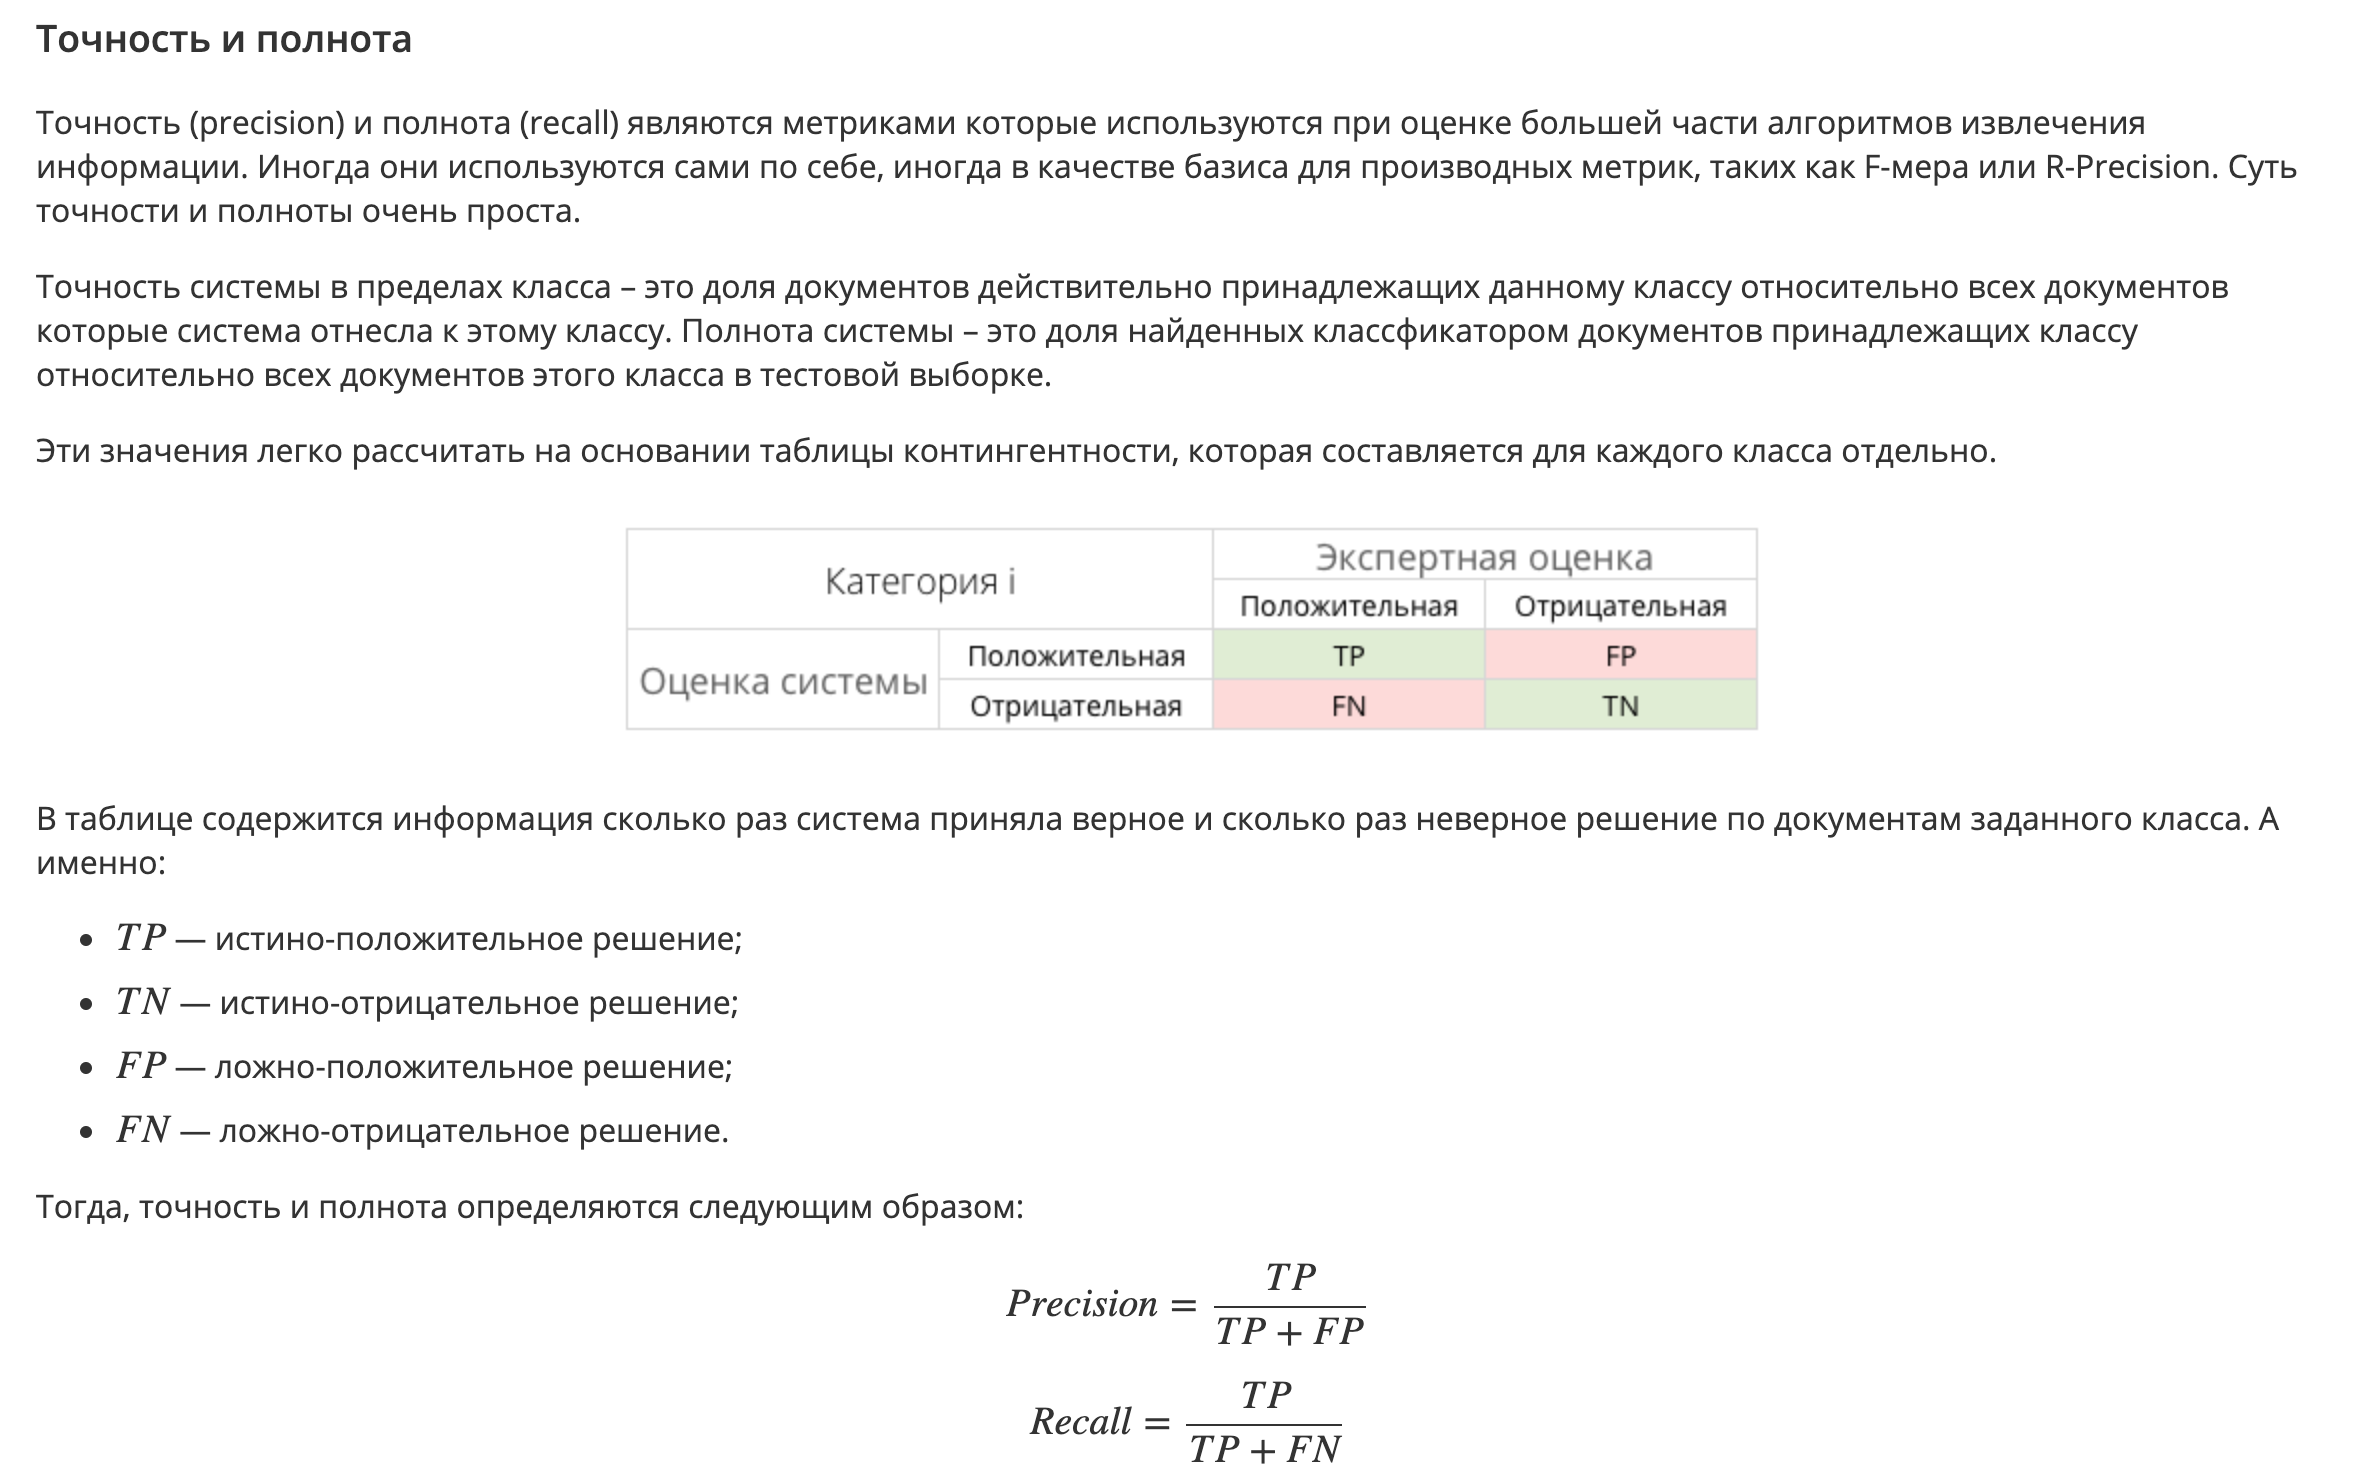

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.55      0.67       148

    accuracy                           1.00     85443
   macro avg       0.94      0.77      0.84     85443
weighted avg       1.00      1.00      1.00     85443



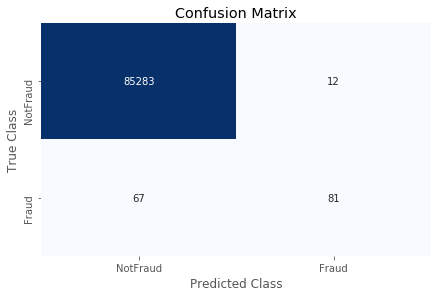

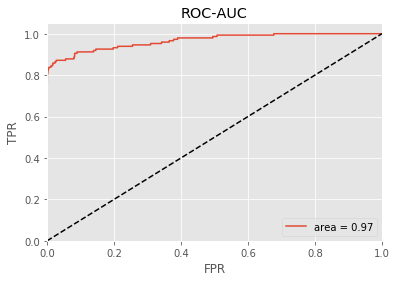

In [938]:
#посмотрим что там у нас получилось с классификатором на тестовой выборке
Pred = Model_LogReg.predict(XTest)
print(classification_report(YTest,Pred))


ClassNames = ['NotFraud','Fraud']
Matrix = confusion_matrix(YTest,Pred) #матрица
DFCM = pd.DataFrame(Matrix,index = ClassNames, columns = ClassNames)   #датафрейм
sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g') #график
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

PredProbaClass = Model_LogReg.predict_proba(XTest)[:,1]
fpr,tpr,_ = roc_curve(YTest,PredProbaClass) #координаты линии
roc_auc = auc(fpr,tpr) #сама метрика

plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
plt.plot([0, 1],[0, 1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title("ROC-AUC"), plt.ylabel("TPR"), plt.xlabel("FPR")
plt.legend(loc = 'lower right')
plt.show()

В итоге как и предполагалось мы имеем классическую ситуацию, когда пытаемся обучить классификатор на выборке с несбалансированными классами, логично что классификатор будет лучше предсказывать тот класс, примеров которого он видел большее количество.

Перейдем к решению подзадачи балансировки классов в генеральном наборе данных.
Есть несколько основных подходов к решению проблемы несбалансированности классов:
1. Oversampling — SMOTE #дополнение knn
2. Undersampling — RandomUnderSampler #обрезание
3. Combined Class Methods — SMOTE + ENN  #дополнение по максималкам 

Каждый подход мы будем тестировать путем обучения логистической регрессии, чтобы сравнивать точность классификации

In [939]:
#Oбернем повторяющийся код деления на тренировчную и тестовую выборку с последующим обучением лог.регрсии в отдельную функцию
def TestClassBalanceMethod(XTrain_Balance,YTrain_Balance,XTest,YTest):
    
    #обучение модели
    Model_LogReg = LogisticRegression()
    Model_LogReg.fit(XTrain_Balance,YTrain_Balance)
    
    #предсказание классов на тестовой выборке
    pred = Model_LogReg.predict(XTest)
    print(classification_report(YTest,pred))
    
    #визуализация результатов работы классификатора
    class_names = ['NotFraud','Fraud']
    Matrix = confusion_matrix(YTest,pred)
    DFCM = pd.DataFrame(Matrix,index =  class_names,columns = class_names)
    sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
    plt.title("Confusion Matrix"),plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()
    
    PredProbaClass = Model_LogReg.predict_proba(XTest)[:,1]
    fpr,tpr,_ = roc_curve(YTest,PredProbaClass)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
    plt.plot([0, 1],[0, 1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.legend(loc = 'lower right')
    plt.show()

1. Oversampling — SMOTE
один из популярных способов справиться с несбалансированными данными - избыточная выборка. Избыточная выборка означает искусственное создание наблюдений в нашем наборе данных, принадлежащих к классу, который недостаточно представлен. Одной из распространенных техник является SMOTE - методика синтетического пересчета меньшинств. На высоком уровне SMOTE создает синтетические наблюдения для класса меньшинства (в данном случае, мошеннических транзакций). На более низком уровне SMOTE выполняет следующие шаги:Нахождение k-ближайших соседей для наблюдений класса меньшинства (поиск похожих наблюдений, случайно выбирая одного из k-ближайших соседей и используя его для создания аналогичных, но случайно настроенных новых наблюдений)
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [940]:
SMT = SMOTE(random_state = 40)
XTrain_SMOTE,YTrain_SMOTE = SMT.fit_sample(XTrain,YTrain.values.ravel()) #добавила .values.ravel()

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.86      0.18       148

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443



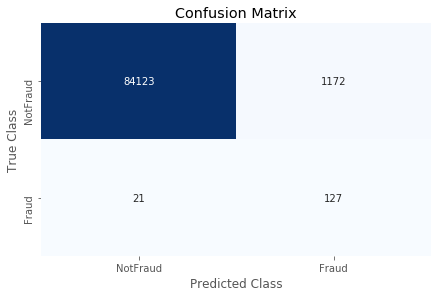

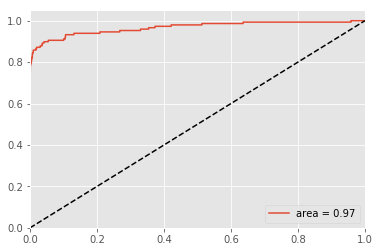

In [941]:
TestClassBalanceMethod(XTrain_SMOTE,YTrain_SMOTE,XTest,YTest)

Ну вот это уже совершенно другое дело, балансировка классов значительно улучшило работу нашего классификатора в отношнии целевого класса Fraud, но мы же исследователи, два других тоже протестируем, чтобы точно быть уверенными в правильности нашего выбора

2. Undersampling — RandomUnderSampler
Оптимизация работает путем выборки доминирующего класса, чтобы уменьшить количество выборок.Один из простых способов недостаточной выборки - это случайный выбор нескольких выборок из класса, который перепредставлен.Оптимизация работает путем выборки доминирующего класса, чтобы уменьшить количество выборок. Один из простых способов недостаточной выборки - это случайный выбор нескольких выборок из класса, который перепредставлен.Класс RandomUnderSampler из библиотеки imblearn - это быстрый и простой способ сбалансировать данные путем случайного выбора подмножества данных для целевых классов. Он работает, выполняя кластеризацию k-средних для большинства классов 
и удаляя точки данных из центроидов высокой плотности. https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html

In [942]:
RUS = RandomUnderSampler(random_state = 40)
XTrain_RUS,YTrain_RUS = RUS.fit_sample(XTrain,YTrain.values.ravel())

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.86      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443



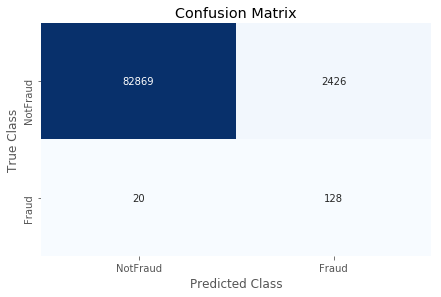

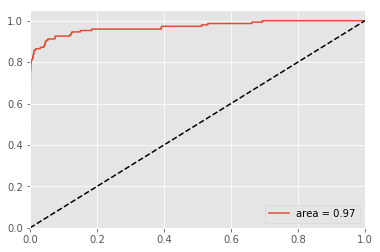

In [943]:
TestClassBalanceMethod(XTrain_RUS,YTrain_RUS,XTest,YTest)
#0.05 в тестовой выборке остался дисбаланс

3. Combined Class Methods — SMOTE + ENN. 
SMOTE может генерировать зашумленные выборки путем интерполяции новых точек между краевыми выбросами и входами. Эта проблема может быть решена путем очистки полученного пространства, полученного после передискретизации. В связи с этим мы будем использовать SMOTE вместе с отредактированными ближайшими соседями (ENN). Здесь ENN используется в качестве метода очистки после избыточного отбора проб SMOTE для получения более чистого пространства. Это легко достижимо с помощью класса SMOTEENN imblearn. https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTEENN.html

In [944]:
#данный подход сложнее чем два предыдущих, поэтому фититься будет дольше
#добавлям наблюдения, обрезаем шумы
SME = SMOTEENN(random_state = 40, n_jobs = -1)
XTrain_SME,YTrain_SME = SME.fit_sample(XTrain,YTrain.values.ravel())

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.86      0.17       148

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443



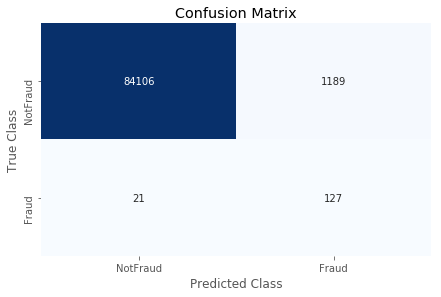

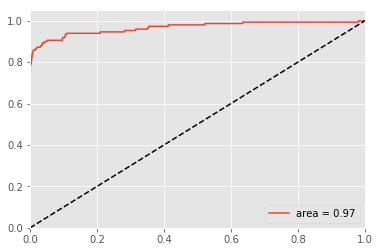

In [945]:
TestClassBalanceMethod(XTrain_SME,YTrain_SME,XTest,YTest)

# Обучение классификатора на ансамблевом алгоритме случайного леса деревьев решений

Как и в случае использования алгоритма логистической регрессии для разработки бинарного классификатора карточных транзакций, попробуем обучиться на несбалансированных данных с помощью алгоритма случайного леса на минималках. 

In [946]:
#провалидируем классификатор с помощью кросс-валидации на 5 фолдах с расчетом среднего значения точности
SKF = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 40)
RFC = RandomForestClassifier()
Results = cross_val_score(RFC,XTrain,YTrain.values.ravel(),cv = SKF)
print("CV accuracy score: {:.2f}%".format(Results.mean()*100))

#картинка по кросс валидации

CV accuracy score: 99.95%


In [947]:
#обучаем на полной тренировочной выборке
Model_RFC_RandSeed = np.random.RandomState(40)
Model_RFC = RandomForestClassifier(random_state = Model_RFC_RandSeed)
Model_RFC.fit(XTrain,YTrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False,
                       random_state=<mtrand.RandomState object at 0x1a31c18948>,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



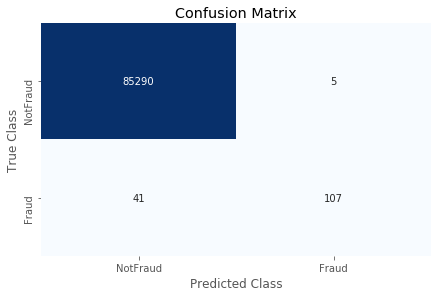

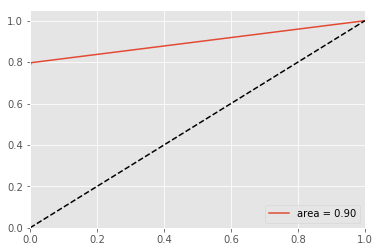

In [948]:
#проверим работоспособность нашего классификатора на тестовой выборке
Pred = Model_RFC.predict(XTest)
print(classification_report(YTest,Pred))

ClassNames = ['NotFraud','Fraud']
Matrix = confusion_matrix(YTest,Pred)
DFCM = pd.DataFrame(Matrix,index = ClassNames, columns = ClassNames)
sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

PredProbaClass = Model_RFC.predict_proba(XTest)[:,1]
fpr,tpr,_ = roc_curve(YTest,PredProbaClass)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
plt.plot([0, 1],[0, 1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc = 'lower right')
plt.show()

In [952]:
recall_score(YTest['Class'], Pred).round(5)

0.72297

В логистической регрессии (и её обобщениях – нейросетях) баланс классов сильно влияет на свободный член, но очень слабо – на коэффициенты наклона. Действительно, предсказанное отношение шансов  из бинарной логистической регрессии меняется на константу при изменении баланса классов, и этот эффект уходит в свободный член.


В деревьях решений (и их обобщениях – случайном лесе и градиентном бустинге), дисбаланс классов влияет на меры неоднородности (impurity) листьев, но это влияние примерно пропорционально для всех кандидатов в очередную разбивку (split), и потому обычно не особо влияет на выбор разбивок.


С другой стороны, на не-вероятностные модели типа SVM дисбаланс классов может серьёзно влиять. SVM строит обучающую гиперплоскость так, что примерно одно и то же число положительных и отрицательных примеров находится на разделяющей полосе или на неправильной её стороне. Поэтому изменение баланса классов может повлиять это число, а значит, и на положение границы.


Когда мы используем вероятностные модели для бинарной классификации, всё ОК: во время обучения, модели не сильно зависят от баланса классов, а при тестировании мы можем использовать метрики, нечувствительные к балансу классов. Такие метрики (например, ROC AUC) зависят от предсказанных вероятностей классов, а не от «жёсткой» дискретной классификации.

Источник: https://habr.com/ru/post/349078/

To-do:
Мы разработали классификатор, основанный на алгоритме случайнго леса решающих деревьев, хоть он и не так чувствителен к дисбалансу классов как логистическая регрессия или нейронная сеть (по причинам описанным выше), точность его работы можно попробовать увеличить. Мы использовали случайный лес на минималках, можно попробовать поиграться с гипер-параметрами алгоритма для улучшения его работы.
Увеличение значений гипер параметров (количество деревьев,глубина... в документации sklearn можно посмотреть полный перечень https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ведет к усложнению архитектуры модели, что в свою очередь может привести к переобучению, для этого было бы неплохо провести процесс регуляризации и подбора оптимальных гипер-параметров, данный процесс хорошо и наглядно описан в одном из занятий курса ODS https://habr.com/ru/company/ods/blog/324402/.

# Домашнее задание

# Дополнительная работа с данными

In [953]:
df = GeneralDataFrame.copy()
#все данные, кроме Amount и Time были отмасштабированы, сделаем тоже самое и с этими двумя колонками
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount'], axis=1, inplace=True) #Time пока оставим, вдруг нагенерим из него новые фичи потом

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(1, 'scaled_amount', scaled_amount)
df.insert(2, 'scaled_time', scaled_time)
df.head()

,Time,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [954]:
FeatureNames = df.iloc[:,1:31].columns #Time пока не берем
Target = df.iloc[:1,31:].columns
print(FeatureNames)
print(Target)

DataFeatures = df[FeatureNames]
DataTarget = df[Target]

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28'],
      dtype='object')
Index(['Class'], dtype='object')


In [955]:
def get_df(features, target) :
    df = pd.DataFrame(features)
    df.insert(features.shape[1], 'Class', target)
    df.columns = np.append(FeatureNames,'Class')
    return df

def check_balance(series) :
    Names = {0:'Not_Fraud',1:'Fraud'}
    print(series.value_counts().rename(index = Names))

In [956]:
def corr_plots(df1, df2) :
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

    # весь датафрейм
    corr = df1.corr()
    sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
    ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

    #сбалансированный датафрейм
    balanced_corr = df2.corr()
    sns.heatmap(balanced_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
    ax2.set_title('Balanced DF Correlation Matrix \n (use for reference)', fontsize=14)
    plt.show()
    return balanced_corr

In [957]:
def get_strong_corr(series) :
    ranged = series.sort_values(ascending = False)
    poscor = ranged[1:5].index.values
    negcor = ranged[-4:].index.values
    print(poscor, negcor)
    return poscor, negcor

In [958]:
def get_boxplots(features, df) :
    f, axes = plt.subplots(ncols=4, figsize=(20,4))
    for i in range(len(features)) :
        sns.boxplot(x="Class", y=features[i], data=df, ax=axes[i])
        axes[i].set_title(features[i] +' vs Class Negative Correlation')
    plt.show()

In [959]:
SMT = SMOTE(random_state = 40)
Features_SMT,Target_SMT = SMT.fit_sample(DataFeatures,DataTarget.values.ravel())

In [960]:
new_df = get_df(Features_SMT, Target_SMT)

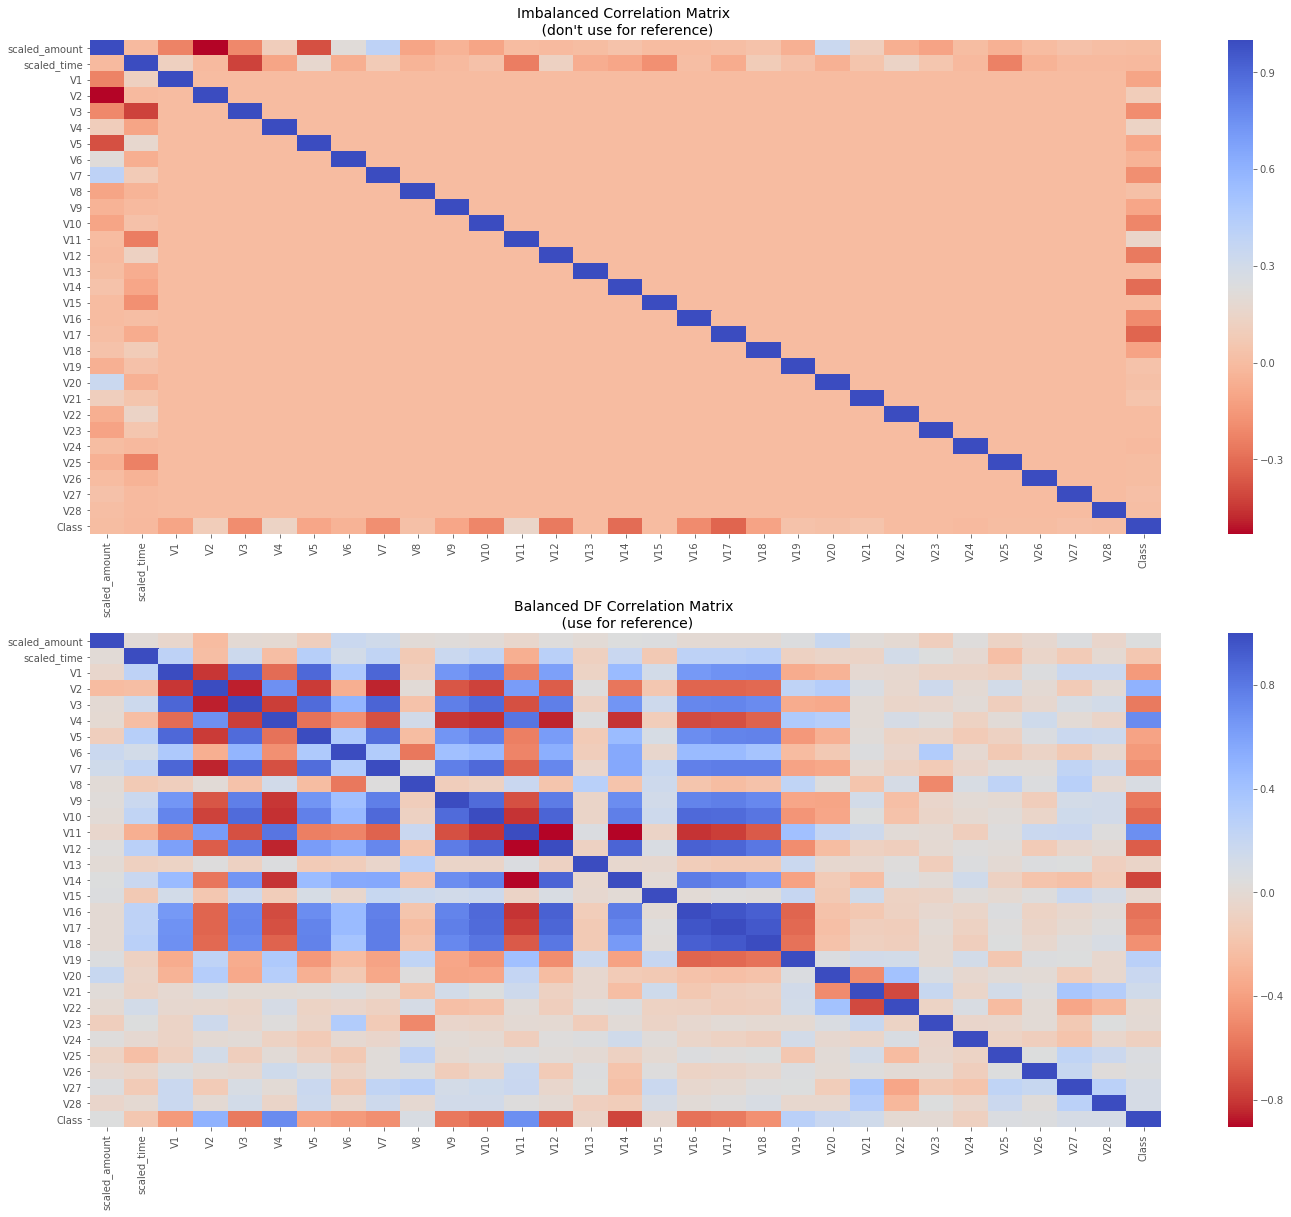

In [961]:
balanced_corr = corr_plots(df.drop(columns = ['Time']), new_df)

In [962]:
strong_poscor_cols, strong_negcor_cols = get_strong_corr(balanced_corr['Class'])

['V4' 'V11' 'V2' 'V19'] ['V16' 'V10' 'V12' 'V14']


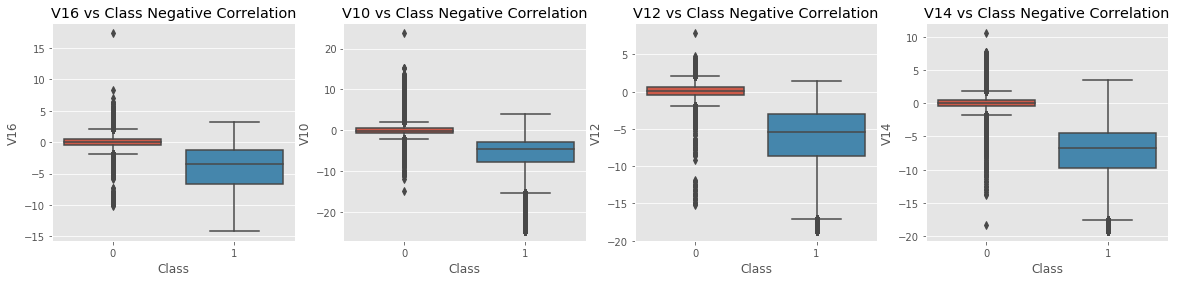

In [963]:
get_boxplots(strong_negcor_cols, new_df)

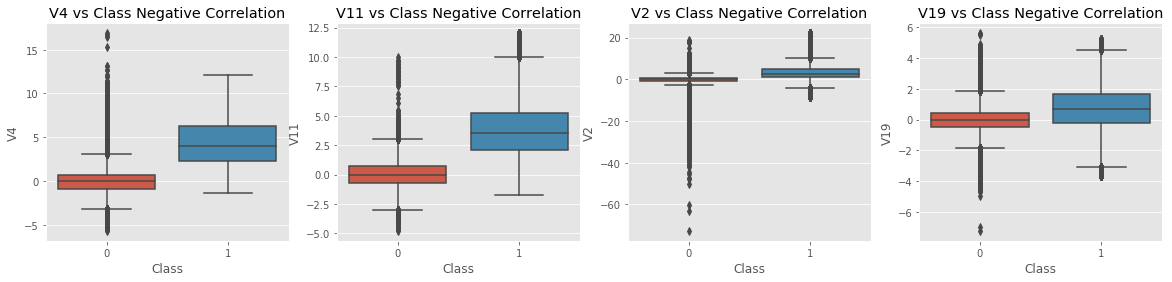

In [964]:
get_boxplots(strong_poscor_cols, new_df)

 # Очистка от выбросов

In [965]:
def get_borders(df, column) :
    values = df[column].loc[df['Class'] == 0].values
    q25, q75 = np.percentile(values, 10), np.percentile(values, 90)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('iqr: {}'.format(iqr))

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('Lower: {}'.format(lower))
    print('Upper: {}'.format(upper))
    
    return lower, upper
#print('V14 outliers:{}'.format(outliers))

In [966]:
def get_nonoutliers (df, column, lower, upper): 
    func = lambda x, y: False if (x < lower or x > upper) and y == 0 else True
    non_outliers = [func(x, y) for x, y in df[[column, 'Class']].values]
    print('Outliers for Fraud Cases: {}'.format(len(non_outliers) - sum(non_outliers)))
    return non_outliers

In [967]:
def check_features(features, df) :
    a = []
    for i in range(len(features)) :
         #for j in range(1) : 
        lower, upper = get_borders(df, features[i])
        a.append(get_nonoutliers(df, features[i], lower, upper))
    return np.array(a).T

In [968]:
a = check_features(strong_poscor_cols, df.drop(columns = ['Time']))

Quartile 25: -1.657574604774584 | Quartile 75: 1.4730132908839582
iqr: 3.1305878956585422
Cut Off: 4.695881843487813
Lower: -6.353456448262397
Upper: 6.1688951343717715
Outliers for Fraud Cases: 159
Quartile 25: -1.28937268429655 | Quartile 75: 1.3125707446694002
iqr: 2.60194342896595
Cut Off: 3.9029151434489253
Lower: -5.192287827745475
Upper: 5.215485888118326
Outliers for Fraud Cases: 26
Quartile 25: -1.3606050071788558 | Quartile 75: 1.320178724189748
iqr: 2.680783731368604
Cut Off: 4.021175597052906
Lower: -5.381780604231762
Upper: 5.341354321242655
Outliers for Fraud Cases: 3499
Quartile 25: -0.9851308154460687 | Quartile 75: 0.9511682367069609
iqr: 1.9362990521530297
Cut Off: 2.9044485782295446
Lower: -3.8895793936756133
Upper: 3.8556168149365053
Outliers for Fraud Cases: 95


In [969]:
b = check_features(strong_negcor_cols, df.drop(columns = ['Time']))

Quartile 25: -1.052626061929654 | Quartile 75: 0.9911689138325326
iqr: 2.0437949757621867
Cut Off: 3.06569246364328
Lower: -4.118318525572934
Upper: 4.056861377475813
Outliers for Fraud Cases: 103
Quartile 25: -1.026609897420618 | Quartile 75: 1.121325561983624
iqr: 2.147935459404242
Cut Off: 3.221903189106363
Lower: -4.248513086526981
Upper: 4.343228751089987
Outliers for Fraud Cases: 1952
Quartile 25: -1.1353204679129238 | Quartile 75: 1.017899352215902
iqr: 2.153219820128826
Cut Off: 3.2298297301932393
Lower: -4.365150198106163
Upper: 4.247729082409141
Outliers for Fraud Cases: 98
Quartile 25: -0.9952323330481654 | Quartile 75: 0.9822014303372961
iqr: 1.9774337633854615
Cut Off: 2.9661506450781925
Lower: -3.961382978126358
Upper: 3.948352075415489
Outliers for Fraud Cases: 765


In [970]:
a = pd.DataFrame(a)
b = pd.DataFrame(b)
vec = pd.concat([a,b], axis=1)
vec.columns = ['1', '2', '3', '4', '5', '6', '7', '8']
func = lambda x: True if sum(x) == 8 else False
vec['res'] = [func(x) for x in vec.values]

In [971]:
vec = vec['res']

In [972]:
clean_df = df.drop(columns = ['Time'])[vec]

In [973]:
df.shape[0] - clean_df.shape[0]
#всего выбросов

5213

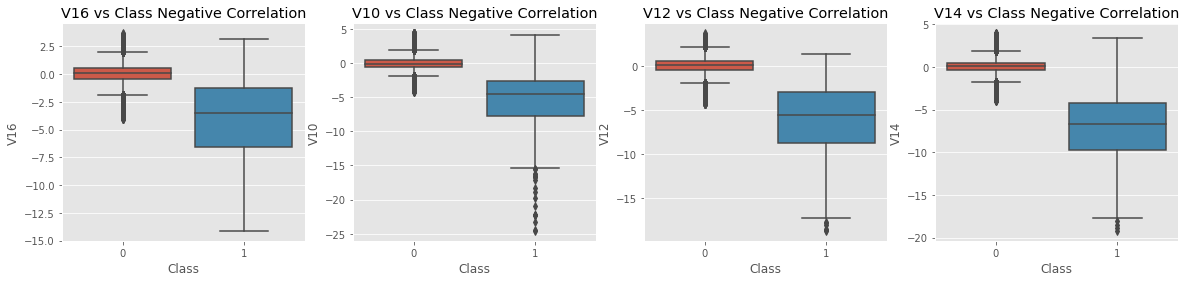

In [974]:
get_boxplots(strong_negcor_cols, clean_df)

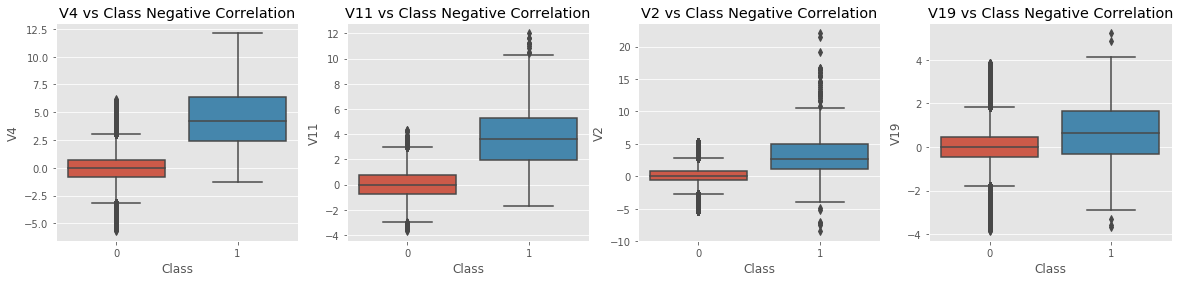

In [975]:
get_boxplots(strong_poscor_cols, clean_df)

In [976]:
FeatureNames = clean_df.iloc[:,:30].columns
Target = clean_df.iloc[:1,30:].columns
print(FeatureNames)
print(Target)

DataFeatures = clean_df[FeatureNames]
DataTarget = clean_df[Target]

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28'],
      dtype='object')
Index(['Class'], dtype='object')


In [977]:
XTrain,XTest,YTrain,YTest = train_test_split(DataFeatures,DataTarget,stratify = DataTarget, #shuffle (default=True)
                                             test_size = 0.3,
                                             random_state = 40) 

print('x_test:' + str(len(XTrain)) + '  y_test:' + str(len(YTrain)))
print('x_train:' + str(len(XTest)) + '  y_train:' + str(len(YTest)))
#разбили исходный датафрейм

x_test:195715  y_test:195715
x_train:83879  y_train:83879


In [978]:
Y = YTrain['Class']
CheckClassesBalance(Y)

Y = YTest['Class']
CheckClassesBalance(Y)

Number of training elements fraud class: 344
Number of training elements not fraud class: 195371
Number of training elements fraud class: 148
Number of training elements not fraud class: 83731


# Снова логрегрессия для сравнения

Запускаем дефолтную логистическую регрессию на оверсампленном датасете, в надежде что от удаления выбросов что-то улучшилось

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     83731
           1       0.06      0.93      0.11       148

    accuracy                           0.97     83879
   macro avg       0.53      0.95      0.55     83879
weighted avg       1.00      0.97      0.99     83879



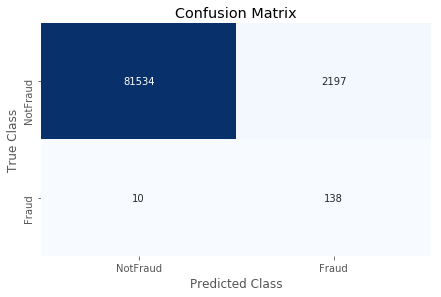

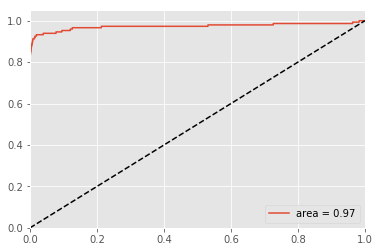

In [979]:
SMT = SMOTE(random_state = 40)
XTrain_SMOTE,YTrain_SMOTE = SMT.fit_sample(XTrain,YTrain.values.ravel()) 
TestClassBalanceMethod(XTrain_SMOTE,YTrain_SMOTE,XTest,YTest)

# Лес

Сможет ли лес побить результат лог регрессии?

In [980]:
#провалидируем классификатор с помощью кросс-валидации на 5 фолдах с расчетом среднего значения точности
SKF = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 40)
RFC = RandomForestClassifier(random_state=Model_RFC_RandSeed, n_jobs=-1)
Results = cross_val_score(RFC,XTrain,YTrain.values.ravel(),cv = SKF)
print("CV accuracy score: {:.2f}%".format(Results.mean()*100))


CV accuracy score: 99.97%


In [981]:
#обучаем на полной тренировочной выборке
Model_RFC_RandSeed = np.random.RandomState(40)
Model_RFC = RandomForestClassifier(random_state = Model_RFC_RandSeed, n_jobs=-1)
Model_RFC.fit(XTrain,YTrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False,
                       random_state=<mtrand.RandomState object at 0x1a5d1bbea0>,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83731
           1       1.00      0.83      0.91       148

    accuracy                           1.00     83879
   macro avg       1.00      0.92      0.95     83879
weighted avg       1.00      1.00      1.00     83879



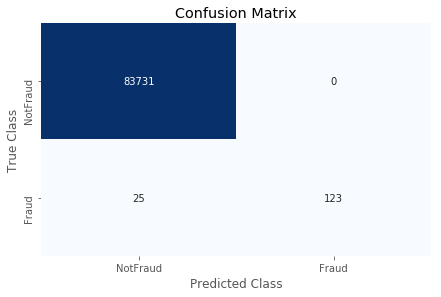

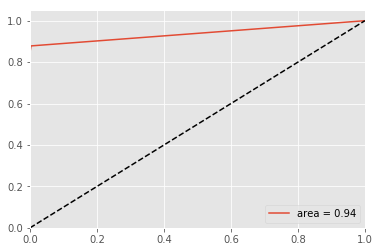

In [982]:
#проверим работоспособность нашего классификатора на тестовой выборке
Pred = Model_RFC.predict(XTest)
print(classification_report(YTest,Pred))

ClassNames = ['NotFraud','Fraud']
Matrix = confusion_matrix(YTest,Pred)
DFCM = pd.DataFrame(Matrix,index = ClassNames, columns = ClassNames)
sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

PredProbaClass = Model_RFC.predict_proba(XTest)[:,1]
fpr,tpr,_ = roc_curve(YTest,PredProbaClass)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
plt.plot([0, 1],[0, 1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc = 'lower right')
plt.show()

In [984]:
recall_score(YTest['Class'], Pred).round(5)

0.83108

Лес не смог :(

# Подбор параметров леса

In [985]:
def plot(max_depth_grid, train_acc, test_acc, title) :
    """Функция для графиков"""
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
    ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
    ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
    ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
    ax.legend(loc='best')
    ax.set_ylim([0.7,1])
    ax.set_ylabel("Recall")
    ax.set_xlabel(title)
    plt.show()

In [986]:
def func(skf, DataFeatures,DataTarget, train_acc, test_acc, rfc) :
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(DataFeatures,DataTarget):
        
        X_train, X_test = DataFeatures.iloc[train_index], DataFeatures.iloc[test_index]
        y_train, y_test = (DataTarget.iloc[train_index]).values.ravel(), (DataTarget.iloc[test_index]).values.ravel()
        rfc.fit(X_train, y_train)
        temp_train_acc.append(recall_score(y_train, rfc.predict(X_train)))
        temp_test_acc.append(recall_score(y_test, rfc.predict(X_test)))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

Опеределение оптимального кол-ва деревьев

In [ ]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=40)
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

train_acc = []
test_acc = []

for ntrees in tqdm(trees_grid):
    rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=ntrees)
    func(skf, DataFeatures,DataTarget, train_acc, test_acc, rfc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

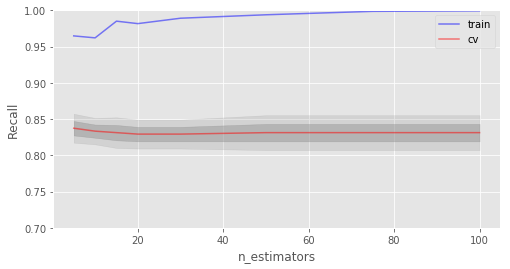

In [765]:
plot(trees_grid, train_acc, test_acc, 'n_estimators')

Определение оптимальной глубины

In [769]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

train_acc = []
test_acc = []

for max_depth in tqdm(max_depth_grid):
    rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=max_depth, n_estimators=15)
    func(skf, DataFeatures,DataTarget, train_acc, test_acc, rfc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))





  0%|          | 0/11 [00:00<?, ?it/s]



  9%|▉         | 1/11 [00:12<02:06, 12.62s/it]



 18%|█▊        | 2/11 [00:30<02:08, 14.32s/it]



 27%|██▋       | 3/11 [00:53<02:13, 16.70s/it]



 36%|███▋      | 4/11 [01:25<02:29, 21.40s/it]



 45%|████▌     | 5/11 [02:01<02:35, 25.85s/it]



 55%|█████▍    | 6/11 [02:45<02:35, 31.08s/it]



 64%|██████▎   | 7/11 [03:33<02:25, 36.35s/it]



 73%|███████▎  | 8/11 [04:21<01:59, 39.91s/it]



 82%|████████▏ | 9/11 [05:09<01:24, 42.34s/it]



 91%|█████████ | 10/11 [06:05<00:46, 46.33s/it]



100%|██████████| 11/11 [07:00<00:00, 48.90s/it]





Best accuracy on CV is 83.33% with 100 trees


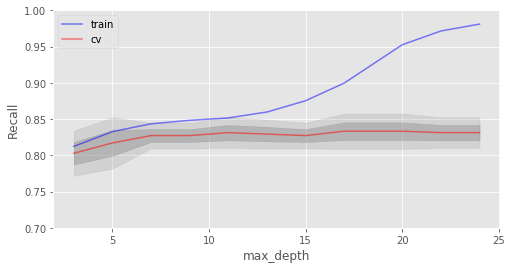

In [770]:
plot(max_depth_grid, train_acc, test_acc, 'max_depth')

Определение оптимального кол-ва объектов в одном листе

In [772]:
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

train_acc = []
test_acc = []

for min_samples_leaf in tqdm(min_samples_leaf_grid):
    rfc = RandomForestClassifier(random_state=42, n_jobs=-1, min_samples_leaf=min_samples_leaf)
    func(skf, DataFeatures,DataTarget, train_acc, test_acc, rfc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} samples".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))





  0%|          | 0/12 [00:00<?, ?it/s]



  8%|▊         | 1/12 [00:34<06:17, 34.33s/it]



 17%|█▋        | 2/12 [01:09<05:47, 34.73s/it]



 25%|██▌       | 3/12 [01:43<05:08, 34.24s/it]



 33%|███▎      | 4/12 [02:16<04:32, 34.06s/it]



 42%|████▏     | 5/12 [02:50<03:56, 33.83s/it]



 50%|█████     | 6/12 [03:24<03:23, 33.96s/it]



 58%|█████▊    | 7/12 [04:01<02:55, 35.02s/it]



 67%|██████▋   | 8/12 [04:36<02:19, 34.85s/it]



 75%|███████▌  | 9/12 [05:08<01:41, 33.98s/it]



 83%|████████▎ | 10/12 [05:39<01:06, 33.13s/it]



 92%|█████████▏| 11/12 [06:10<00:32, 32.47s/it]



100%|██████████| 12/12 [06:41<00:00, 32.20s/it]





Best accuracy on CV is 83.33% with 5 trees


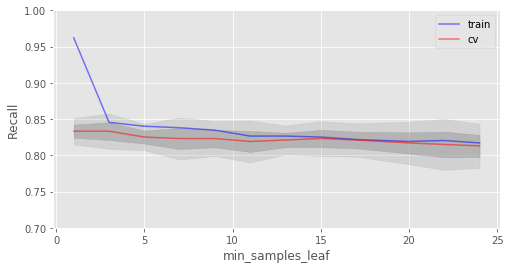

In [773]:
plot(min_samples_leaf_grid, train_acc, test_acc, 'min_samples_leaf')

Определение максимального количества фич

In [774]:
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

train_acc = []
test_acc = []

for max_features in tqdm(max_features_grid):
    rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_features=max_features)
    func(skf, DataFeatures,DataTarget, train_acc, test_acc, rfc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} features".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))





  0%|          | 0/8 [00:00<?, ?it/s]



 12%|█▎        | 1/8 [00:18<02:09, 18.53s/it]



 25%|██▌       | 2/8 [00:48<02:11, 21.84s/it]



 38%|███▊      | 3/8 [01:27<02:16, 27.21s/it]



 50%|█████     | 4/8 [02:25<02:25, 36.33s/it]



 62%|██████▎   | 5/8 [03:28<02:13, 44.40s/it]



 75%|███████▌  | 6/8 [04:46<01:48, 54.32s/it]



 88%|████████▊ | 7/8 [06:10<01:03, 63.22s/it]



100%|██████████| 8/8 [07:49<00:00, 74.12s/it]





Best accuracy on CV is 82.93% with 20 trees


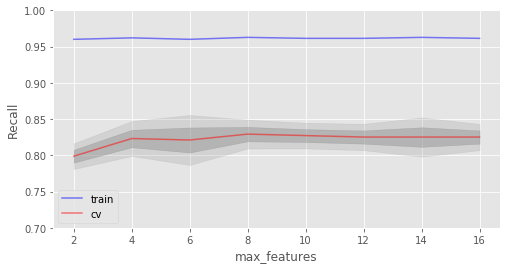

In [775]:
plot(max_features_grid, train_acc, test_acc, 'max_features')

Выбор оптимальных параметров

In [987]:
#инициализация параметров, по которым хотим сделать полный перебор
parameters = {'n_estimators': [5, 10, 15], 'min_samples_leaf': [5, 10, 15], 'max_depth': [7,11,13], 'max_features': ['auto', 4, 8]}
rfc = RandomForestClassifier(random_state=42)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1, scoring = 'recall')
gcv.fit(XTrain, YTrain)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 19.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=40, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=Fa

In [988]:
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83731
           1       1.00      0.83      0.91       148

    accuracy                           1.00     83879
   macro avg       1.00      0.92      0.95     83879
weighted avg       1.00      1.00      1.00     83879



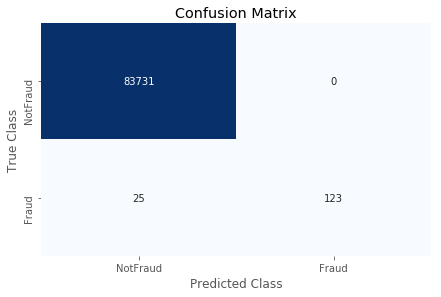

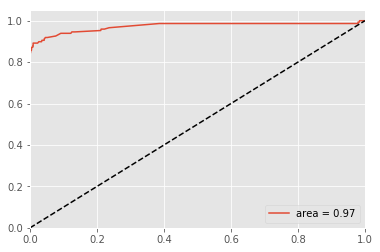

In [989]:
#проверим работоспособность нашего классификатора на тестовой выборке
Model_RFC = gcv.best_estimator_
Pred = Model_RFC.predict(XTest)
print(classification_report(YTest,Pred))

ClassNames = ['NotFraud','Fraud']
Matrix = confusion_matrix(YTest,Pred)
DFCM = pd.DataFrame(Matrix,index = ClassNames, columns = ClassNames)
sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

PredProbaClass = Model_RFC.predict_proba(XTest)[:,1]
fpr,tpr,_ = roc_curve(YTest,PredProbaClass)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
plt.plot([0, 1],[0, 1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc = 'lower right')
plt.show()

In [990]:
recall_score(YTest['Class'], Pred).round(5)

0.83108

# Isolation Forest

In [991]:
from sklearn.ensemble import IsolationForest

In [992]:
IF=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0, behaviour = 'new')

In [993]:
IF.fit(XTrain)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

In [994]:
pred_train = IF.predict(XTrain) 
pred_test = IF.predict(XTest) 

In [995]:
func = lambda x: 0 if x == 1 else 1

pred_train = [func(x) for x in pred_train]
pred_test = [func(x) for x in pred_test]

In [996]:
recall_score(YTrain['Class'], pred_train)

0.7005813953488372

In [997]:
recall_score(YTest['Class'], pred_test).round(5)

0.71622

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     83731
           1       0.13      0.72      0.22       148

    accuracy                           0.99     83879
   macro avg       0.56      0.85      0.61     83879
weighted avg       1.00      0.99      0.99     83879



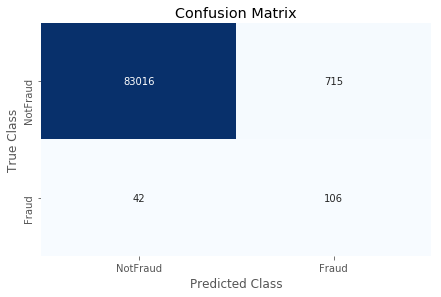

In [998]:
print(classification_report(YTest['Class'], pred_test))

ClassNames = ['NotFraud','Fraud']
Matrix = confusion_matrix(YTest['Class'], pred_test)
DFCM = pd.DataFrame(Matrix,index = ClassNames, columns = ClassNames)
sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [999]:
#инициализация параметров, по которым хотим сделать полный перебор
parameters = {'n_estimators': [5, 10, 15], 'max_samples': [300,500,1000], 'max_features': [4, 6, 8]}
IF = IsolationForest(random_state=42)
recall_fraud = make_scorer(recall_score, pos_label=-1)
gcv = GridSearchCV(IF, parameters, n_jobs = -1, verbose = 1, cv = skf, scoring = recall_fraud) 

func = lambda x: -1 if x == 1 else 1

ytrain = YTrain['Class']
ytrain = [func(x) for x in ytrain]

gcv.fit(XTrain, ytrain)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=40, shuffle=True),
             error_score='raise-deprecating',
             estimator=IsolationForest(behaviour='old', bootstrap=False,
                                       contamination='legacy', max_features=1.0,
                                       max_samples='auto', n_estimators=100,
                                       n_jobs=None, random_state=42, verbose=0,
                                       warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [4, 6, 8],
                         'max_samples': [300, 500, 1000],
                         'n_estimators': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(recall_score, pos_label=-1), verbose=1)

In [1000]:
gcv.best_estimator_

IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=6, max_samples=1000, n_estimators=15, n_jobs=None,
                random_state=42, verbose=0, warm_start=False)

In [1001]:
pred_train = gcv.best_estimator_.predict(XTrain) 
pred_test = gcv.best_estimator_.predict(XTest) 

In [1002]:
func = lambda x: 0 if x == 1 else 1

pred_train = [func(x) for x in pred_train]
pred_test = [func(x) for x in pred_test]

In [1003]:
recall_score(YTrain['Class'], pred_train)

0.8953488372093024

In [1004]:
recall_score(YTest['Class'], pred_test).round(5)

0.89865

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     83731
           1       0.02      0.90      0.03       148

    accuracy                           0.90     83879
   macro avg       0.51      0.90      0.49     83879
weighted avg       1.00      0.90      0.95     83879



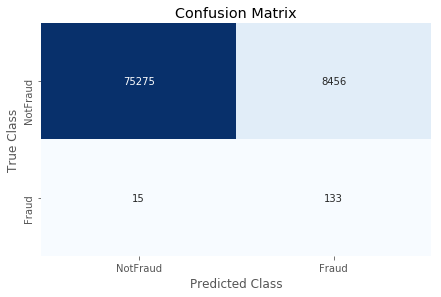

In [1005]:
print(classification_report(YTest['Class'], pred_test))

ClassNames = ['NotFraud','Fraud']
Matrix = confusion_matrix(YTest['Class'], pred_test)
DFCM = pd.DataFrame(Matrix,index = ClassNames, columns = ClassNames)
sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# Результаты

| Модель        |  Recall            |
| ------------- |:------------------:|
| Лес из коробки на исходных данных    | 0.72297               |
| Логистическая регрессия на данных без выбросов     | 0.93 |
| Лес  на данных без выбросов  |        0.83108  |
| Лес  на данных без выбросов после перебора параметров |        0.83108  |
| Isolation Forest  на данных без выбросов  |        0.71622  |
| Isolation Forest  на данных без выбросов  после перебора параметров|        0.89865  |
